1\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and stardand deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

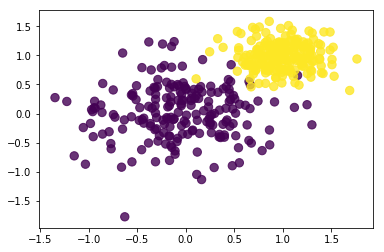

In [2]:
from IPython.display import Image
Image('two_categories_scatter_plot.png')

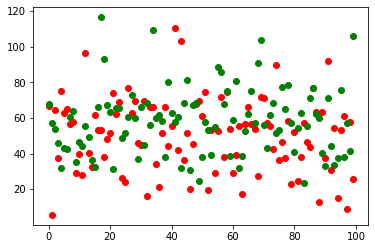

In [54]:
import numpy as np
import matplotlib.pyplot as plt

def two_categories_data(mean1,mean2,std1,std2,size):
    d1 = np.random.normal(loc=mean1, scale=std1, size=size)
    d1y = np.random.normal(loc=mean1, scale=std1, size=size)
    d2 = np.random.normal(loc=mean2, scale=std2, size=size)
    d2y = np.random.normal(loc=mean2, scale=std2, size=size)
    
    dataset= [[list(d1),list(d1y)],[list(d2),list(d2y)]]
    return dataset




datasets_2d= two_categories_data(50,60,20,20,100)
#datasets_2d[0]
plt.plot(datasets_2d[0][0], 'ro')
plt.plot(datasets_2d[1][1], 'go')

# plt.figure()

    

2\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn jointplot of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [2]:
import pickle
import pandas as pd
import seaborn as sns

data = pd.read_pickle("data/residuals_261.pkl")

data_dic = data[()] #this trick makes pickle to dictionary
data_dic = pd.DataFrame(data_dic) #dic to dataframe

#new_DF = data[data['CreditCardType'] == 'American Express']
clean_dataframe = data_dic[(data_dic['residuals']**2)<=4] #tried to make absolute value
clean_dataframe

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


As we can see from the histograms, residuals has a very high similarity to clustered gaussian shape wherase the distances are wider because we didn't filtered them.

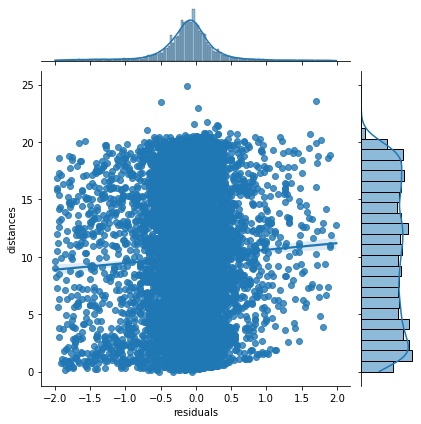

In [3]:
sns.jointplot(data=clean_dataframe, x="residuals", y="distances", kind="reg")



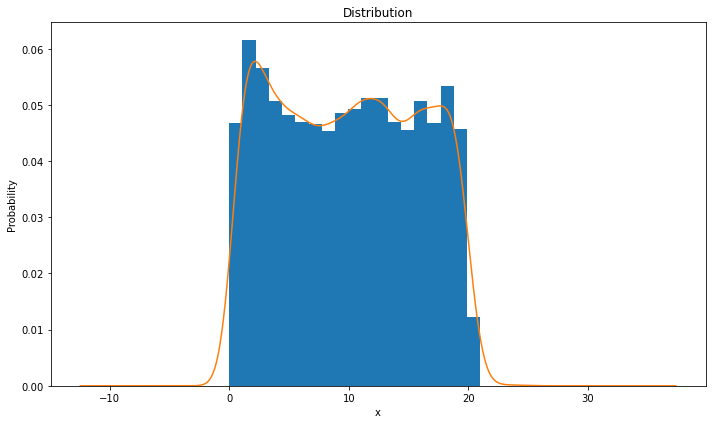

In [51]:

# Comment on the correlation between these variables.

# Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
# Obtain 3 numpy arrays:
# x, the array of bin centers of the profile histogram of the "distance" variable
# y, the mean values of the "residuals", estimated in slices (bins) of "distance"
# err_y, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
# Plot the profile plot on top of the scatter plot



import matplotlib.pyplot as plt
%matplotlib inline

# always useful
import numpy as np
#nrnd = np.random.normal(loc=0., scale=1., size=(100,))
# generate 100 random numbers using a Gaussian pdf
#n,bins,patches = plt.hist(x=x,bins = 13)
nrnd = clean_dataframe['distances'] 
fig, ax = plt.subplots(figsize=(10, 6)) # create the figure and the axes
h, bins, _ = plt.hist(nrnd, bins=19, range=(0, +21), density=True, cumulative=False) # create and plot the histogram
nrnd.plot.kde(ax=ax, legend=False)

ax.set_title('Distribution')
ax.set_xlabel('x')
ax.set_ylabel('Probability')
fig.tight_layout()

# # print histogram content and bins
# print("Histogram content:", h)
# print("Bin boundaries:", bins)

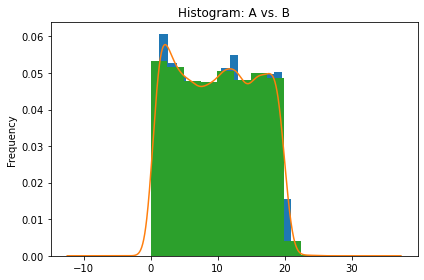

In [17]:
num_bins = 19

fig, ax = plt.subplots()

mu = nrnd.mean()  # mean of distribution

sigma = nrnd.std()  # standard deviation of distribution


# the histogram of the data
n, bins, patches = ax.hist(nrnd, num_bins, density=True)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))

nrnd.plot.kde(ax=ax, legend=False, title='Histogram: A vs. B')
nrnd.plot.hist(density=True, ax=ax)

# ax.plot(bins, y, '--')
# ax.set_xlabel('Smarts')
# ax.set_ylabel('Probability density')
# ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# # Tweak spacing to prevent clipping of ylabel
# fig.tight_layout()
# plt.show()


# # nrnd.plot.kde(ax=ax, legend=False, title='Histogram: A vs. B')
# # nrnd.plot.hist(density=True, ax=ax)
# ax.set_ylabel('Probability')
# ax.grid(axis='y')
# ax.set_facecolor('#d8dcd6')

In [14]:
# bins
# x = np.array([i+bins[1]/2 for i in bins][:-1])

# nrnd 
# # [i for i in range(len(nrnd))]  len(nrnd)//19
# #[nrnd[i*len(nrnd)//19::len(nrnd)//19].mean() for i in range(len(nrnd)//19)]
# tem = []
# for i in range(0,len(nrnd),len(nrnd)//19):
#     tem.append(nrnd[i:i*len(nrnd)//19].mean())
#     print(i)

# tem


3\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


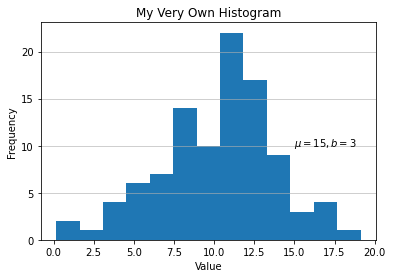

In [56]:
means = 10
stdevs = 4
size = 100
x = np.random.normal(loc=means, scale=stdevs, size=size)
n,bins,patches = plt.hist(x=x,bins = 13)

plt.grid(axis='y', alpha=0.75)

plt.text(15, 10, r'$\mu=15, b=3$')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('My Very Own Histogram')
maxfreq = n.max()
# Set a clean upper y-axis limit.
#plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [ ]:
#Kernel Density Estimate
#2 cat dataset creater missing